#EDA

#

--

#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # run pip install plotly if error
import seaborn
import seaborn as sns
import plotly.express as px # if error install in terminal : pip install plotly
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score


warnings.filterwarnings('ignore')

%matplotlib inline # show the plots on the online copy


UsageError: unrecognized arguments: # show the plots on the online copy


In [2]:
clients = pd.read_csv('/Users/kelechijohn/Neuefische/ML-Project-FraudDetection/data/train/client_train.csv')
invoices = pd.read_csv('/Users/kelechijohn/Neuefische/ML-Project-FraudDetection/data/train/invoice_train.csv')
data = pd.merge(clients, invoices, how='left', on='client_id')
data.head(3)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC


# Data mining!

1- date.time for dates tranformation
2- 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


In [4]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%Y/%m/%d')


In [5]:
# Transforming to date.time type
data['creation_date'] = pd.to_datetime(data['creation_date'], format='%d/%m/%Y')

In [6]:
#
data.dtypes

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [7]:
# Change datatypes
data = data.astype({'disrict': str})
data = data.astype({'client_catg': str})
data = data.astype({'region': str})
data = data.astype({'tarif_type': str})
data = data.astype({'counter_number': str})
data = data.astype({'counter_code': str})
data = data.astype({'reading_remarque': str})
data = data.astype({'counter_coefficient': str})
data = data.astype({'counter_type': str})

data.dtypes

disrict                         object
client_id                       object
client_catg                     object
region                          object
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                      object
counter_number                  object
counter_statue                  object
counter_code                    object
reading_remarque                object
counter_coefficient             object
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [8]:
dist_cols = pd.get_dummies(data['disrict'], prefix='district_', drop_first=True)
dist_cols1 = pd.get_dummies(data['client_catg'], prefix='client_catg_', drop_first=True)
dist_cols2 = pd.get_dummies(data['region'], prefix='region_', drop_first=True)
dist_cols3 = pd.get_dummies(data['tarif_type'], prefix='tarif_type_', drop_first=True)
dist_cols4 = pd.get_dummies(data['counter_statue'], prefix='counter_statue_', drop_first=True)
#dist_cols5 = pd.get_dummies(data['counter_code'], prefix='counter_code_', drop_first=True)
dist_cols6 = pd.get_dummies(data['reading_remarque'], prefix='reading_remarque_', drop_first=True)
dist_cols7 = pd.get_dummies(data['counter_coefficient'], prefix='counter_coefficient_', drop_first=True)
dist_cols8 = pd.get_dummies(data['counter_type'], prefix='counter_type_', drop_first=True)

# counter_number not


In [9]:
data = pd.concat([data, dist_cols, dist_cols1, dist_cols2, dist_cols3 ], axis=1)
data = pd.concat([data, dist_cols6,dist_cols4, dist_cols7, dist_cols8], axis=1)

In [10]:
#data.head(1)
#data.info()
data.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue',
       ...
       'counter_coefficient__30', 'counter_coefficient__33',
       'counter_coefficient__4', 'counter_coefficient__40',
       'counter_coefficient__5', 'counter_coefficient__50',
       'counter_coefficient__6', 'counter_coefficient__8',
       'counter_coefficient__9', 'counter_type__GAZ'],
      dtype='object', length=104)

In [11]:
dist_cols.head(1)

,district__62,district__63,district__69
0,0,0,0


In [12]:
data.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue',
       ...
       'counter_coefficient__30', 'counter_coefficient__33',
       'counter_coefficient__4', 'counter_coefficient__40',
       'counter_coefficient__5', 'counter_coefficient__50',
       'counter_coefficient__6', 'counter_coefficient__8',
       'counter_coefficient__9', 'counter_type__GAZ'],
      dtype='object', length=104)

In [13]:
data = data.drop(['disrict', 'client_catg', 'region', 'tarif_type', 'counter_statue', 'counter_code', 'reading_remarque', 'counter_coefficient','counter_type','counter_number'], axis=1)

In [14]:
data.head(2)

,client_id,creation_date,target,invoice_date,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,...,counter_coefficient__30,counter_coefficient__33,counter_coefficient__4,counter_coefficient__40,counter_coefficient__5,counter_coefficient__50,counter_coefficient__6,counter_coefficient__8,counter_coefficient__9,counter_type__GAZ
0,train_Client_0,1994-12-31,0.0,2014-03-24,82,0,0,0,14302,14384,...,0,0,0,0,0,0,0,0,0,0
1,train_Client_0,1994-12-31,0.0,2013-03-29,1200,184,0,0,12294,13678,...,0,0,0,0,0,0,0,0,0,0


# Split the data

In [16]:
# Before we go on let's split the data into features and target label
X = data.drop(['target','client_id', 'creation_date', 'invoice_date'], axis=1)
y = data['target']# Y



In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=150)
# Split the 'features' and 'income' data into training and testing sets

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3133724 samples.
Testing set has 1343025 samples.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 94 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   client_id                object        
 1   creation_date            datetime64[ns]
 2   target                   float64       
 3   invoice_date             datetime64[ns]
 4   consommation_level_1     int64         
 5   consommation_level_2     int64         
 6   consommation_level_3     int64         
 7   consommation_level_4     int64         
 8   old_index                int64         
 9   new_index                int64         
 10  months_number            int64         
 11  district__62             uint8         
 12  district__63             uint8         
 13  district__69             uint8         
 14  client_catg__12          uint8         
 15  client_catg__51          uint8         
 16  region__103              uint8         
 17  region__104              ui

In [19]:
numerical = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'months_number' ]

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [20]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])
# Show an example of a record with scaling applied
X_train[numerical].sample(1)

,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
4079493,0.00069,0.0,0.0,0.0,0.000818,0.000829,0.000006


In [ ]:
train_scaled = pd.concat([X_train, y_train], axis=1)
test_scaled = pd.concat([X_test, y_test], axis=1)
data_scaled = pd.concat([train_scaled, test_scaled], axis=0)
data_scaled.shape

data_scaled.to_csv('./data/data_scaled.csv')


In [ ]:
# Oversample training data
#data_scaled_sample =data_scaled.sample(frac=0.2, replace=False, random_state=150)
# X = data_scaled_sample.drop(['target'],axis=1)
# y = data_scaled_sample.target


# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=150)
# ros = RandomOverSampler(random_state=150)


# X_train_scaled_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# data_scaled_ros = pd.concat([X_train_scaled_ros, y_train_ros], axis=1)



In [ ]:
%store X_train_scaled_ros
%store y_train_ros
%store X_test
%store y_test

UsageError: Unknown variable 'X_train_scaled_ros'


In [ ]:
test = pd.concat([X_test, y_test], axis=1)
data_ros = pd.concat([data_scaled_ros, test], axis=0)
data_ros.shape

NameError: name 'data_scaled_ros' is not defined

In [ ]:
%store data_ros

Stored 'data_ros' (DataFrame)


(1153924, 76)

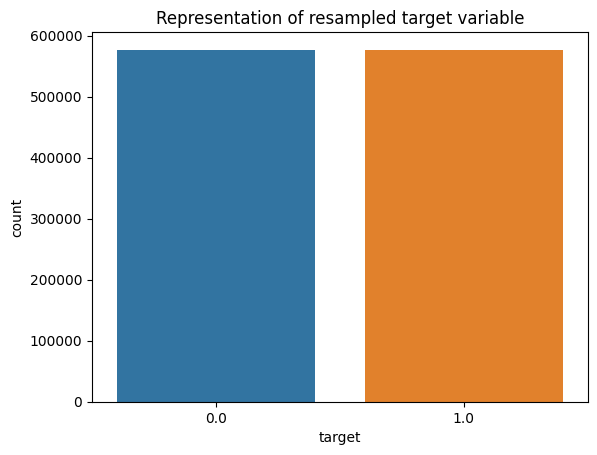

In [ ]:
sns.countplot(x=y_train_ros).set_title("Representation of resampled target variable");
data_scaled_ros.shape


Recall:  0.5451979534427096
Report:                precision    recall  f1-score   support

         0.0       0.94      0.67      0.78   1237091
         1.0       0.12      0.55      0.20    105934

    accuracy                           0.66   1343025
   macro avg       0.53      0.61      0.49   1343025
weighted avg       0.88      0.66      0.73   1343025



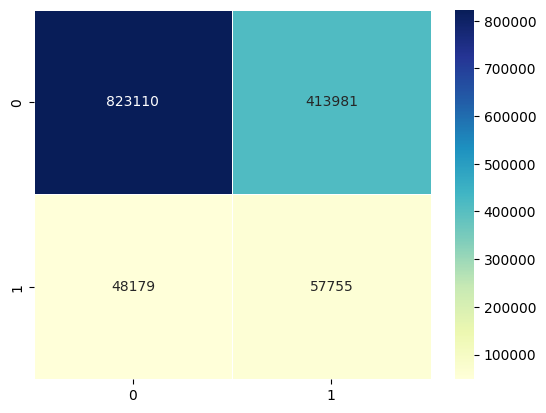

In [ ]:
# Modelling Decisiontree regression
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train_scaled_ros, y_train_ros)
y_pred = dtree.predict(X_test)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('Report: ',metrics.classification_report(y_test, y_pred))

In [ ]:
dtree.get_params().keys()
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {"ccp_alpha" : [0.0, 0.1, 0.5, 1], #this actually defines the model you use
              "max_depth" : [4,5,6,7 ,10, 15, 20,],
              "max_features" : ["sqrt", "none"],
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='recall',
                  cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train_scaled_ros, y_train_ros)


Fitting 5 folds for each of 56 candidates, totalling 280 fits


KeyboardInterrupt: 

In [ ]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

In [ ]:
dtree_best = gs.best_estimator_

In [ ]:
dtree_best.fit(X_train_scaled_ros, y_train_ros)
y_pred_best = dtree_best.predict(X_test)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_test, y_pred_best)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_test, y_pred_best))
print('Report: ',metrics.classification_report(y_test, y_pred_best))

In [ ]:
y_pred_train = dtree.predict(X_train_scaled_ros)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_train_ros, y_pred_train)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_train_ros, y_pred_train))
print('Report: ',metrics.classification_report(y_train_ros, y_pred_train))

In [ ]:
X_train_scaled_ros.info()

In [ ]:
%store data_scaled

In [ ]:
X_train

In [ ]:
# Decisiontree Basemodel
# import necessary library  
from sklearn.tree import plot_tree
# import the regressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score


Recall:  0.18818320841278532
Report:                precision    recall  f1-score   support

         0.0       0.93      0.93      0.93   1237091
         1.0       0.18      0.19      0.19    105934

    accuracy                           0.87   1343025
   macro avg       0.56      0.56      0.56   1343025
weighted avg       0.87      0.87      0.87   1343025



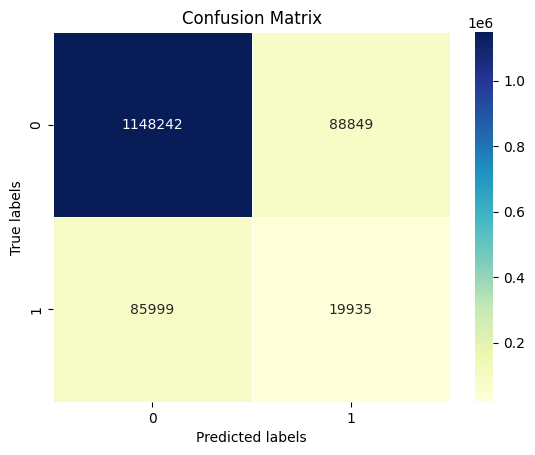

In [ ]:

# Modelling Decisiontree regression
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5, ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);    
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('Report: ',metrics.classification_report(y_test, y_pred))

Recall:  0.9480900403757616
Report:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2886546
         1.0       1.00      0.95      0.97    247178

    accuracy                           1.00   3133724
   macro avg       1.00      0.97      0.99   3133724
weighted avg       1.00      1.00      1.00   3133724



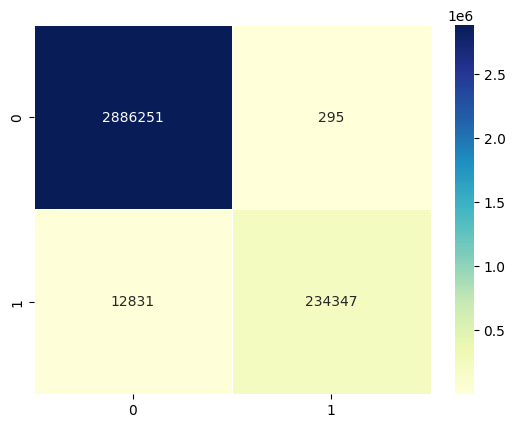

In [ ]:
y_pred_train = dtree.predict(X_train)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_train, y_pred_train))
print('Report: ',metrics.classification_report(y_train, y_pred_train))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

fpr_RF, tpr_RF, thresholds_RF = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:,1])

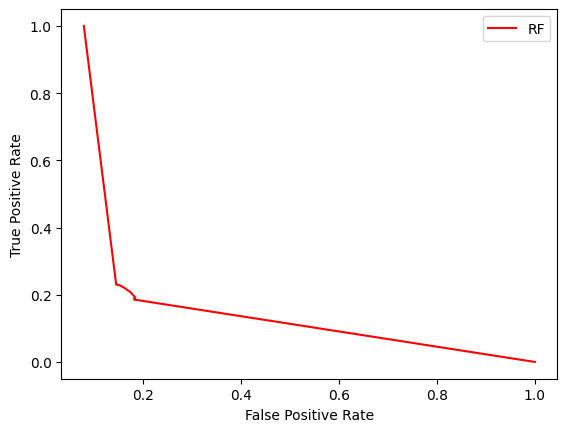

In [ ]:
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
# plt.plot([0,1],[0,1],'k-',label='random')
# plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from matplotlib import pyplot
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
%store X_train
%store y_train
%store X_test
%store y_test



In [ ]:
X_train.info()

In [ ]:
data_scaled.head(10)

In [ ]:
invoices.head()

In [ ]:
X = data_scaled[['consommation_level_1', 'old_index', 'new_index']]
y = data_scaled.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=150)
# Split the 'features' and 'income' data into training and testing sets

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
# Modelling Decisiontree regression
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('Report: ',metrics.classification_report(y_test, y_pred))